Análise Exploratória dos Dados
- Transformação dos dados

In [2]:
import pandas as pd
treino = pd.read_csv('train_2.csv')
teste = pd.read_csv('test_2.csv')
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,12,2008,WD,Normal,250000


In [3]:
treino.shape

(1460, 81)

In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Quantidade de colunas de cada tipo
treino.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
# Cardinalidade
treino.nunique().sort_values(ascending=False).head(15)

Id               1460
LotArea          1073
GrLivArea         861
BsmtUnfSF         780
1stFlrSF          753
TotalBsmtSF       721
SalePrice         663
BsmtFinSF1        637
GarageArea        441
2ndFlrSF          417
MasVnrArea        327
WoodDeckSF        274
OpenPorchSF       202
BsmtFinSF2        144
EnclosedPorch     120
dtype: int64

In [7]:
# Entendimento da variável target (SalePrice)
treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

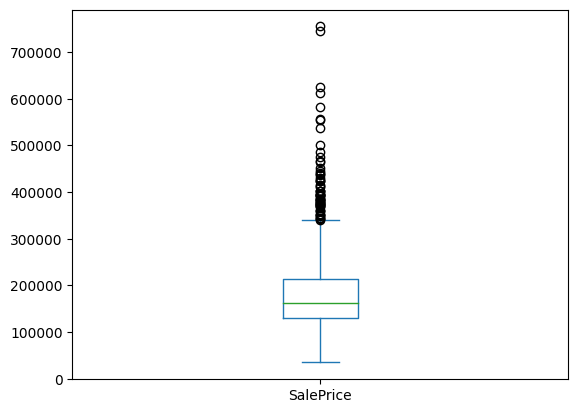

In [8]:
treino.SalePrice.plot.box()

In [9]:
# Avaliação da correlação entre os valores
treino.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

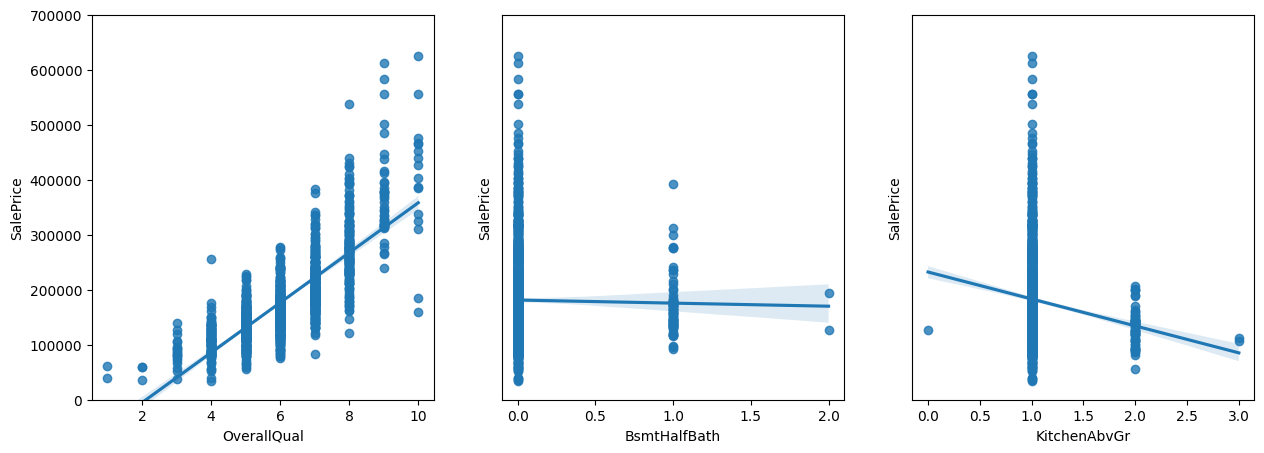

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=3, figsize=(15,5))

sns.regplot(data=treino, x='OverallQual', y='SalePrice', ax=ax[0])
sns.regplot(data=treino,x='BsmtHalfBath',y='SalePrice',ax=ax[1])
sns.regplot(data=treino,x='KitchenAbvGr',y='SalePrice',ax=ax[2])

ax[0].set(ylim=(0,700000))
ax[1].set(ylim=(0,700000),yticks=[])
ax[2].set(ylim=(0,700000),yticks=[])

plt.show()

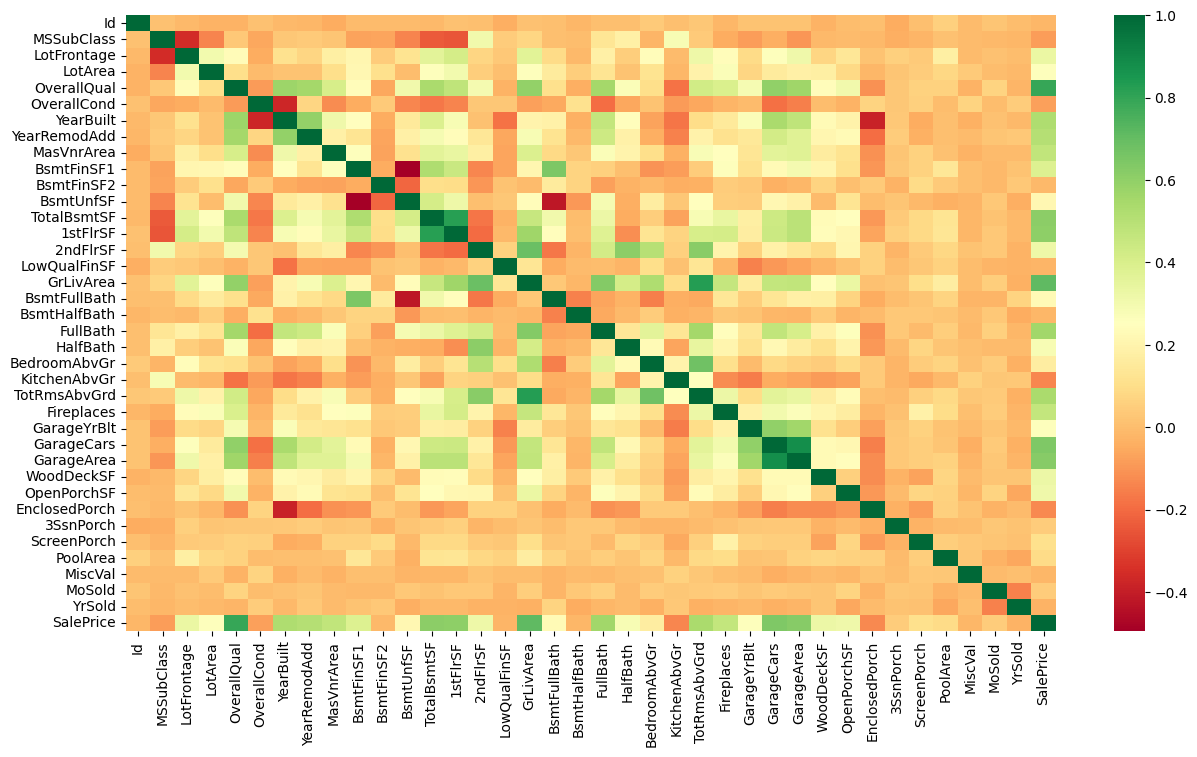

In [11]:
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))

sns.heatmap(treino.corr(), cmap='RdYlGn')

plt.show()

Variáveis categóricas

In [12]:
obj_cols = treino.columns[treino.dtypes == 'object']
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Visualização das casas mais caras
caras = treino.sort_values('SalePrice').tail(10)
caras = caras[obj_cols]
caras.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial
769,RL,Pave,-1,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
440,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,WD,Normal
1046,RL,Pave,-1,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial


In [14]:
# Visualização das casas mais baratas
baratas = treino.sort_values('SalePrice').head(10)
baratas = baratas[obj_cols]
baratas.head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml
968,RM,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,...,-1,-1,-1,-1,Y,-1,GdWo,-1,WD,Abnorml
533,RL,Pave,-1,Reg,Low,AllPub,Inside,Mod,BrkSide,Norm,...,-1,-1,-1,-1,N,-1,-1,-1,WD,Normal
30,C (all),Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,...,Detchd,Unf,TA,Fa,N,-1,MnPrv,-1,WD,Normal


In [15]:
caras_val = caras.nunique()
caras_val.head()

MSZoning       1
Street         1
Alley          1
LotShape       3
LandContour    2
dtype: int64

In [16]:
baratas_val = baratas.nunique()
baratas_val.head()

MSZoning       3
Street         2
Alley          3
LotShape       2
LandContour    3
dtype: int64

In [17]:
rep = pd.concat([caras_val,baratas_val], axis=1).sort_values([0,1]).head(15)
rep

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [18]:
caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning,Alley,Foundation,BsmtCond,HeatingQC,Electrical
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,-1,PConc,TA,Ex,SBrkr


In [19]:
baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning,Alley,Foundation,BsmtCond,HeatingQC,Electrical
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all),-1,CBlock,TA,TA,FuseA
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all),-1,CBlock,TA,TA,FuseA
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM,-1,BrkTil,TA,Fa,SBrkr
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL,-1,Slab,-1,Fa,FuseF
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all),Pave,BrkTil,TA,TA,SBrkr
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL,-1,CBlock,TA,Gd,SBrkr
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM,Grvl,CBlock,TA,Fa,FuseA
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM,-1,Slab,-1,Fa,SBrkr
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM,-1,BrkTil,Fa,Fa,SBrkr
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all),-1,CBlock,TA,TA,FuseA


Análise das colunas:

        Utilities
        CentralAir
        PavedDrive
        MSZoning
        GarageQual


In [20]:
treino.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [21]:
teste.Utilities.value_counts()

AllPub    1459
Name: Utilities, dtype: int64

In [22]:
treino = treino.drop('Utilities', axis=1)
teste = teste.drop('Utilities', axis=1)


In [23]:
treino.CentralAir.value_counts()


Y    1365
N      95
Name: CentralAir, dtype: int64

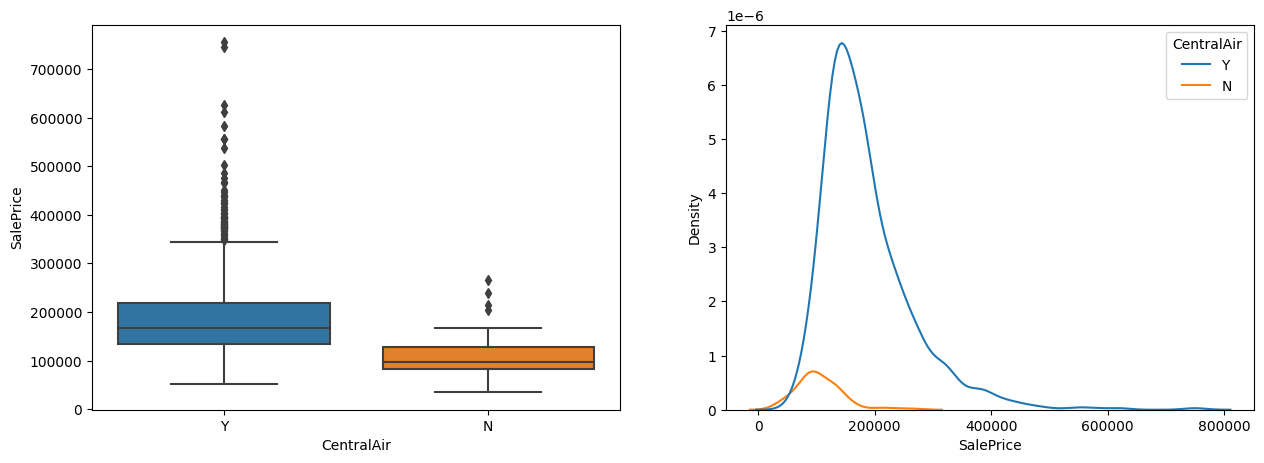

In [24]:
# Relação como o preço
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(x=treino.CentralAir, y=treino.SalePrice, ax=ax[0])
sns.kdeplot(x=treino.SalePrice, hue=treino.CentralAir, ax=ax[1])

plt.show()


In [25]:
treino['CentralAirCheck'] = treino['CentralAir']
treino['CentralAir'] = treino.CentralAir.apply(lambda x: 1 if x== 'Y' else 0)

In [26]:
treino[['CentralAirCheck', 'CentralAir']].value_counts()

CentralAirCheck  CentralAir
Y                1             1365
N                0               95
dtype: int64

In [27]:
treino = treino.drop('CentralAirCheck', axis=1)

In [28]:
teste['CentralAir'] = teste.CentralAir.apply(lambda x: 1 if x == "Y" else 0)

Análise coluna PaveDrive

In [29]:
treino.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [30]:
coluna = 'PavedDrive'

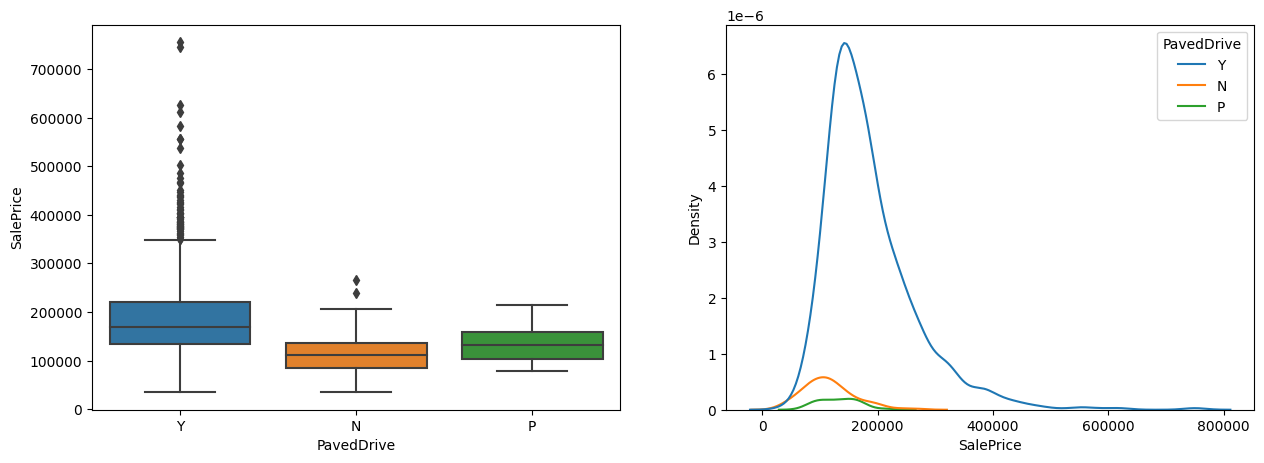

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(x=treino[coluna],y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino[coluna],ax=ax[1])

plt.show()


Transformação de valores de texto em números

In [32]:
# Criação da função
def DefinePavedDrive(x):
    if  x == 'Y':
        return 1
    elif x == 'N':
        return 0
    elif x == 'P':
        return 0.5
    else:
        return -1

In [33]:
treino['PavedDriveCheck'] = treino['PavedDrive']
treino['PavedDrive'] = treino.PavedDrive.apply(DefinePavedDrive)

In [34]:
treino[['PavedDriveCheck', 'PavedDrive']].value_counts()

PavedDriveCheck  PavedDrive
Y                1.0           1340
N                0.0             90
P                0.5             30
dtype: int64

In [35]:
treino = treino.drop('PavedDriveCheck', axis=1)

In [36]:
# Para base de teste
teste['PavedDrive'] = teste.PavedDrive.apply(DefinePavedDrive)

Entendimento da relação do "MSZoning" com o preço

In [37]:
treino.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [38]:
treino.groupby('MSZoning')['SalePrice'].agg(['mean', 'min', 'max', 'count', 'median'])

,mean,min,max,count,median
MSZoning,,,,,
C (all),74528.000000,34900,133900,10,74700.0
FV,214014.061538,144152,370878,65,205950.0
RH,131558.375000,76000,200000,16,136500.0
RL,191004.994787,39300,755000,1151,174000.0
RM,126316.830275,37900,475000,218,120500.0


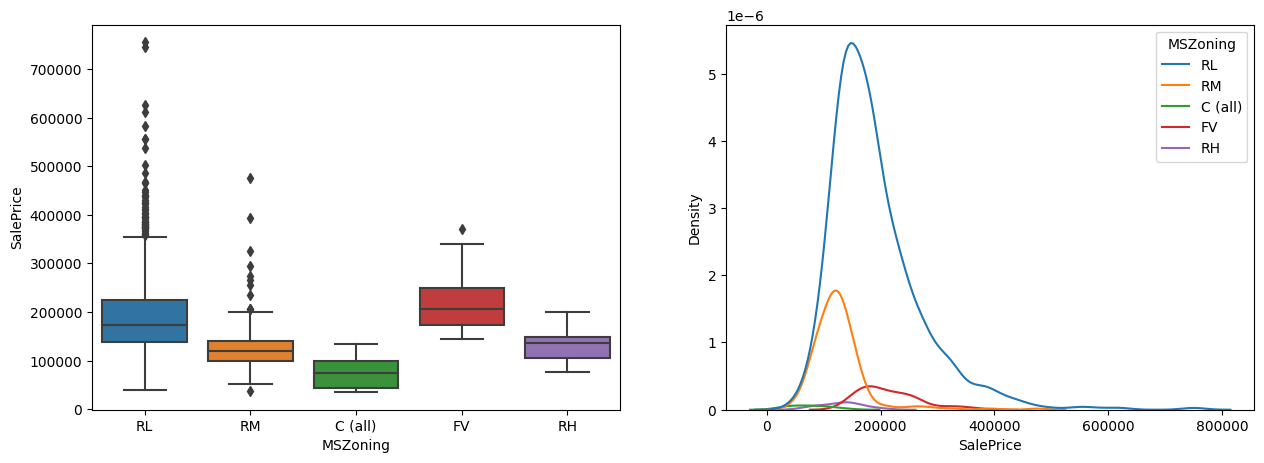

In [39]:
coluna = 'MSZoning'

fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino[coluna],y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino[coluna],ax=ax[1])

plt.show()

Utilização do OneHotEncoder
 Transformação das variáveis textuais em uma nova coluna

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
# Criação do encoder
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore')
# Fit com os dados
ohe_MSZoning = ohe_MSZoning.fit(treino[['MSZoning']])
# Transformação 
ohe_MSZoning.transform(treino[['MSZoning']]).toarray()


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [42]:
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(treino[['MSZoning']]).toarray(),
                               columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [43]:
treino = pd.concat([treino, ohe_MSZoning_df], axis=1)
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,Inside,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,FR2,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,Inside,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,Corner,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,FR2,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0


In [44]:
treino = treino.drop('MSZoning', axis=1)

In [45]:
ohe_MSZoning.transform(teste[['MSZoning']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [46]:
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(teste[['MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(3)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0


In [47]:
teste = pd.concat([teste,ohe_MSZoning_df],axis=1)
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1461,20,RH,80.0,11622,Pave,-1,Reg,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,1.0,0.0,0.0
1,1462,20,RL,81.0,14267,Pave,-1,IR1,Lvl,Corner,...,12500,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
2,1463,60,RL,74.0,13830,Pave,-1,IR1,Lvl,Inside,...,0,3,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
3,1464,60,RL,78.0,9978,Pave,-1,IR1,Lvl,Inside,...,0,6,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0
4,1465,120,RL,43.0,5005,Pave,-1,IR1,HLS,Inside,...,0,1,2010,WD,Normal,0.0,0.0,0.0,1.0,0.0


In [48]:
teste = teste.drop('MSZoning',axis=1)

Análise das informações sobre garagem

In [49]:
treino.GarageQual.value_counts()

TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

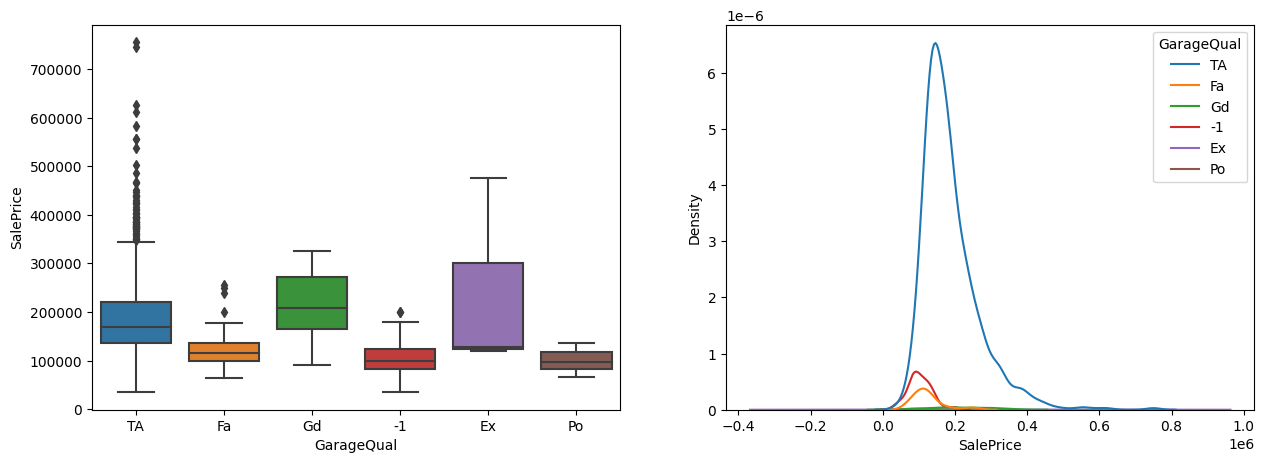

In [50]:
coluna = 'GarageQual'

fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.boxplot(x=treino[coluna], y=treino.SalePrice, ax=ax[0])
sns.kdeplot(x=treino.SalePrice, hue=treino[coluna], ax=ax[1])

plt.show()

In [51]:
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [52]:
treino[cols_garagem].head(5)

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,Attchd,2003.0,RFn,2,548,TA,TA
1,Attchd,1976.0,RFn,2,460,TA,TA
2,Attchd,2001.0,RFn,2,608,TA,TA
3,Detchd,1998.0,Unf,3,642,TA,TA
4,Attchd,2000.0,RFn,3,836,TA,TA


In [53]:
treino[['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            1291
-1          -1              81
Fa          TA              24
            Fa              20
TA          Fa              15
Gd          TA              10
TA          Gd               5
Fa          Po               4
Gd          Gd               4
Po          Po               3
Ex          Ex               2
            TA               1
dtype: int64

In [54]:
treino[treino.GarageQual == treino.GarageCond].shape[0]/treino.shape[0]

0.9595890410958904

'GarageCond' praticamente tem as mesmas informações de 'GarageQual'

In [55]:
treino = treino.drop('GarageCond', axis=1)

Análise relação entre "GarageCars" e "GarageArea"

In [56]:
treino[['GarageCars','GarageArea','SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [57]:
treino = treino.drop('GarageArea',axis=1)

In [58]:
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual'],
      dtype='object')

Análise da correlação entre as datas de construção


In [59]:
treino[['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.272009,0.146341,0.261354
YearBuilt,0.272009,1.000000,0.592855,0.522897
YearRemodAdd,0.146341,0.592855,1.000000,0.507101
SalePrice,0.261354,0.522897,0.507101,1.000000


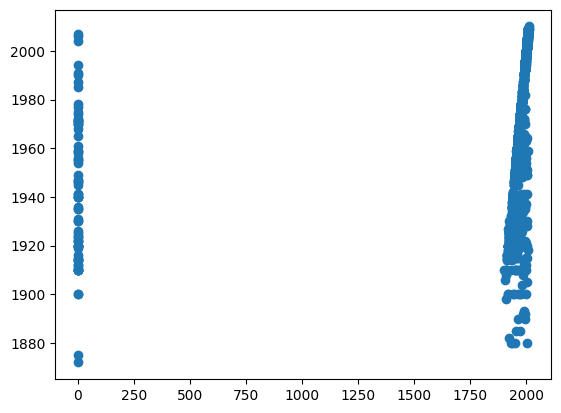

In [60]:
fig, ax = plt.subplots()

ax.scatter(treino.GarageYrBlt, treino.YearBuilt)

plt.show()

In [61]:
treino.loc[treino.GarageYrBlt != -1,['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.825667,0.642277,0.486362
YearBuilt,0.825667,1.000000,0.618058,0.507584
YearRemodAdd,0.642277,0.618058,1.000000,0.505434
SalePrice,0.486362,0.507584,0.505434,1.000000


In [62]:
treino = treino.drop('GarageYrBlt',axis=1)

In [63]:
treino.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [64]:
ohe_GarageType = OneHotEncoder(handle_unknown='ignore',
                              min_frequency=25)

In [65]:
ohe_GarageType = ohe_GarageType.fit(treino[['GarageType']])

In [66]:
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(treino[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())
ohe_GarageType_df.head()

,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0


In [67]:
treino = pd.concat([treino,ohe_GarageType_df],axis=1)

In [68]:
treino = treino.drop('GarageType',axis=1)

In [69]:
# Criação da lista de ordem de valores
GarageFinish_oe = ['Unf','RFn','Fin']
GarageQual_oe = ['Po','Fa','TA','Gd','Ex']

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
oe_garagem = OrdinalEncoder(categories=[GarageFinish_oe, GarageQual_oe],
                            handle_unknown='use_encoded_value',
                            unknown_value=-1,
                            dtype='int32')

In [72]:
oe_garagem = oe_garagem.fit(treino[['GarageFinish','GarageQual']])

In [73]:
oe_garagem.transform(treino[['GarageFinish','GarageQual']])

array([[1, 2],
       [1, 2],
       [1, 2],
       ...,
       [1, 2],
       [0, 2],
       [2, 2]])

In [74]:
treino[['GarageFinishCheck','GarageQualCheck']] = treino[['GarageFinish','GarageQual']]
treino[['GarageFinish','GarageQual']] = oe_garagem.transform(treino[['GarageFinish','GarageQual']])

In [75]:
treino.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,GarageType_-1,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_infrequent_sklearn,GarageFinishCheck,GarageQualCheck
0,1,60,65.0,8450,Pave,-1,Reg,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA
1,2,20,80.0,9600,Pave,-1,Reg,Lvl,FR2,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA
2,3,60,68.0,11250,Pave,-1,IR1,Lvl,Inside,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA
3,4,70,60.0,9550,Pave,-1,IR1,Lvl,Corner,Gtl,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Unf,TA
4,5,60,84.0,14260,Pave,-1,IR1,Lvl,FR2,Gtl,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,RFn,TA


In [76]:
treino[['GarageFinishCheck','GarageFinish']].value_counts()


GarageFinishCheck  GarageFinish
Unf                 0              605
RFn                 1              422
Fin                 2              352
-1                 -1               81
dtype: int64

In [77]:
treino[['GarageQualCheck','GarageQual']].value_counts()

GarageQualCheck  GarageQual
TA                2            1311
-1               -1              81
Fa                1              48
Gd                3              14
Ex                4               3
Po                0               3
dtype: int64

In [78]:
treino = treino.drop(['GarageFinishCheck','GarageQualCheck'],axis=1)

Todos os tratamentos para a base de teste

In [79]:
teste = teste.drop('GarageCond',axis=1)

In [80]:
teste = teste.drop('GarageArea',axis=1)

In [81]:
teste = teste.drop('GarageYrBlt',axis=1)

In [82]:
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(teste[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())

teste = pd.concat([teste,ohe_GarageType_df],axis=1)

teste = teste.drop('GarageType',axis=1)

In [83]:
teste[['GarageFinish','GarageQual']] = oe_garagem.transform(teste[['GarageFinish','GarageQual']])

In [107]:
teste.shape

(1459, 145)

In [84]:
#treino.to_csv('train_3_1.csv',index=False)
#teste.to_csv('test_3_1.csv',index=False)

Tratamento das outras colunas que ainda estão como texto

In [85]:
treino.dtypes.value_counts()

int64      35
object     35
float64    13
int32       2
dtype: int64

In [86]:
treino.columns[treino.dtypes.values == 'object']

Index(['Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [87]:
# Separacçao das colunas pelos índices
colunas_ohe = [0,1,3,4,6,7,8,9,10,11,12,13,14,15,18,24,26,28,31,32,33,34]
colunas_oe = [2,5,16,17,19,20,21,22,23,25,27,29,30]

In [88]:
cols_ohe = treino.columns[treino.dtypes.values == 'object'][colunas_ohe]
cols_ohe

Index(['Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'Electrical', 'Functional', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [89]:
cols_oe = treino.columns[treino.dtypes.values == 'object'][colunas_oe]
cols_oe

Index(['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'FireplaceQu', 'PoolQC'],
      dtype='object')

In [90]:
# Definindo a ordem dos valores de cada coluna do OrdinalEncoder
dados_oe = []
dados_oe.append(['IR3','IR2','IR1','Reg']) # LotShape
dados_oe.append(['Gtl','Mod','Sev']) # LandSlope
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # ExterCond
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # BsmtCond
dados_oe.append(['No','Mn','Av','Gd']) # BsmtExposure
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType1
dados_oe.append(['Unf','LwQ','Rec','BLQ','ALQ','GLQ']) # BsmtFinType2
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # HeatingQC
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # KitchenQual
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # FireplaceQu
dados_oe.append(['Po','Fa','TA','Gd','Ex']) # PoolQC

In [91]:
ohe = OneHotEncoder(handle_unknown='infrequent_if_exist',
                   min_frequency=50,
                   drop='if_binary',
                   dtype='int64'
                   )

In [92]:
dados_ohe = treino[cols_ohe]
dados_ohe.head()

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
1,Pave,-1,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,MetalSd,None,CBlock,GasA,SBrkr,Typ,-1,-1,WD,Normal
2,Pave,-1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal
3,Pave,-1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Wd Shng,None,BrkTil,GasA,SBrkr,Typ,-1,-1,WD,Abnorml
4,Pave,-1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Typ,-1,-1,WD,Normal


In [93]:
ohe = ohe.fit(dados_ohe)

In [94]:
ohe_df = pd.DataFrame(ohe.transform(dados_ohe).toarray(),
                     columns=ohe.get_feature_names_out())
ohe_df.head()

,Street_infrequent_sklearn,Alley_-1,Alley_Grvl,Alley_infrequent_sklearn,LandContour_Bnk,LandContour_HLS,LandContour_Lvl,LandContour_infrequent_sklearn,LotConfig_Corner,LotConfig_CulDSac,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [95]:
treino = pd.concat([treino,ohe_df],axis=1)

In [96]:
dados_ohe_teste = teste[cols_ohe]
dados_ohe_teste.head(3)

,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,Functional,Fence,MiscFeature,SaleType,SaleCondition
0,Pave,-1,Lvl,Inside,NAmes,Feedr,Norm,1Fam,1Story,Gable,...,VinylSd,None,CBlock,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal
1,Pave,-1,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,...,Wd Sdng,BrkFace,CBlock,GasA,SBrkr,Typ,-1,Gar2,WD,Normal
2,Pave,-1,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,...,VinylSd,None,PConc,GasA,SBrkr,Typ,MnPrv,-1,WD,Normal


In [97]:
ohe_df = pd.DataFrame(ohe.transform(dados_ohe_teste).toarray(),
                     columns=ohe.get_feature_names_out())

teste = pd.concat([teste,ohe_df],axis=1)
teste.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Fence_MnPrv,Fence_infrequent_sklearn,MiscFeature_infrequent_sklearn,SaleType_New,SaleType_WD,SaleType_infrequent_sklearn,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_infrequent_sklearn
0,1461,20,80.0,11622,Pave,-1,Reg,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0
1,1462,20,81.0,14267,Pave,-1,IR1,Lvl,Corner,Gtl,...,0,0,1,0,1,0,0,1,0,0
2,1463,60,74.0,13830,Pave,-1,IR1,Lvl,Inside,Gtl,...,1,0,0,0,1,0,0,1,0,0
3,1464,60,78.0,9978,Pave,-1,IR1,Lvl,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0
4,1465,120,43.0,5005,Pave,-1,IR1,HLS,Inside,Gtl,...,0,0,0,0,1,0,0,1,0,0


In [98]:
oe = OrdinalEncoder(categories=dados_oe,
                     handle_unknown='use_encoded_value',
                     unknown_value=-1,
                     dtype='int64'                       
                    )

In [99]:
dados_oe = treino[cols_oe]
dados_oe.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,-1,-1
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,-1
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,-1


In [100]:
oe = oe.fit(dados_oe)

In [101]:
treino[cols_oe] = oe.transform(dados_oe)

In [102]:
dados_oe_teste = teste[cols_oe]
dados_oe_teste.head(3)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,PoolQC
0,Reg,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,TA,-1,-1
1,IR1,Gtl,TA,TA,TA,TA,No,ALQ,Unf,TA,Gd,-1,-1
2,IR1,Gtl,TA,TA,Gd,TA,No,GLQ,Unf,Gd,TA,TA,-1


In [103]:
teste[cols_oe] = oe.transform(dados_oe_teste)

Eliminando as colunas do ohe

In [104]:
treino = treino.drop(cols_ohe,axis=1)
teste = teste.drop(cols_ohe,axis=1)

In [109]:
treino.shape

(1460, 146)

In [110]:
treino.to_csv('train_3_2.csv',index=False)
teste.to_csv('test_3_2.csv',index=False)